### 1. Import Library

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Penjelasan:
1. Pandas dan numpy : untuk manipulasi data dan perhitungan numerik
2. Matplotlib.pyplot : untuk visualisasi data
3. Cosine_similarity: untuk menghitung kemiripan antar lagu berdasarkan fitur numerik
4. StandardScaler: untuk menormalisasi fitur agar perbandingan antar fitur menjadi adil
5. Drive.mount: Menghubungkan google drive agar bisa mengakses file dataset (spotify_songs.csv) dari dalam Google Colab.

### 2. Load Dataset

In [3]:
df_music = pd.read_csv('/content/drive/MyDrive/spotify_songs.csv')

#### Penjelasan:
1. Membaca file CSV dari Google Drive dan menyimpannya dalam variabel df_music menggunakan pandas.
2. Dataset ini berisi informasi tentang berbagai lagu dan playlist Spotify.

In [6]:
# Informasi dasar dataset
print("Jumlah data:", len(df_music))
print("Kolom:", df_music.columns.tolist())
print("Jumlah nilai null:\n", df_music.isnull().sum())
df_music.describe()

Jumlah data: 32833
Kolom: ['track_id', 'track_name', 'track_artist', 'track_popularity', 'track_album_id', 'track_album_name', 'track_album_release_date', 'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']
Jumlah nilai null:
 track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
val

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


#### Penjelasan:
1. len(df_music): Menampilkan jumlah baris dalam dataset (total lagu yang tersedia).
2. df_music.columns.tolist(): Menampilkan semua nama kolom.
3.  df_music.isnull().sum(): Mengecek jumlah data kosong (missing values) di tiap kolom.
4. df_music.describe(): Menampilkan statistik deskriptif untuk kolom numerik seperti mean, min, max, dll.

#### Hasil yang ditampilkan:
1. Terdapat 32833 lagu.
2. Ada 5 nilai kosong pada kolom track_id, track_name, dan track_artist.
3. Ini memberi gambaran awal apakah dataset bersih dan siap digunakan.

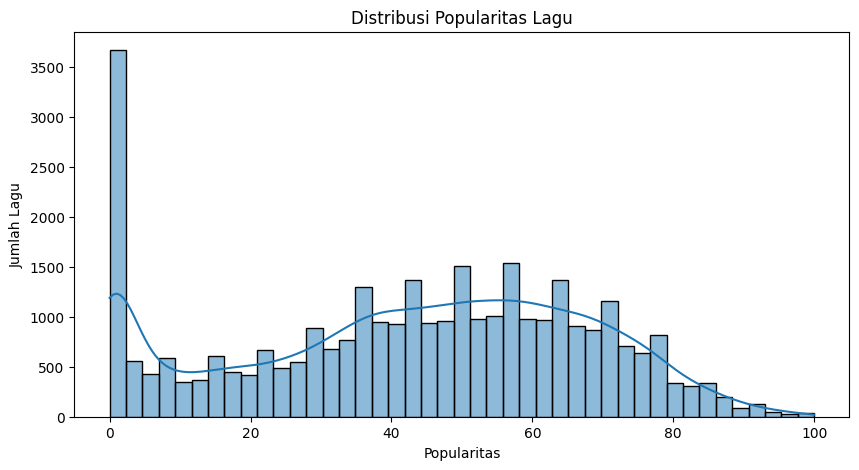

In [8]:
# Visualisasi distribusi popularitas
plt.figure(figsize=(10, 5))
sns.histplot(df_music['track_popularity'], kde=True)
plt.title('Distribusi Popularitas Lagu')
plt.xlabel('Popularitas')
plt.ylabel('Jumlah Lagu')
plt.show()

#### Penjelasan:
1. plt.figure(figsize=(10, 5)): Mengatur ukuran grafik agar lebih lebar dan mudah dibaca.
2. sns.histplot(...): Membuat histogram distribusi popularitas lagu.
- df_music['track_popularity']: Kolom yang divisualisasikan.
- kde=True: Menambahkan kurva KDE (Kernel Density Estimation) untuk menunjukkan bentuk distribusi.
3. plt.title, plt.xlabel, plt.ylabel: Menambahkan judul dan label sumbu.

#### Hasil:
1. Terlihat bahwa banyak lagu memiliki popularitas sangat rendah (dekat 0), kemungkinan besar lagu-lagu ini kurang dikenal.
2. Distribusi cenderung kanan miring (right skewed), menunjukkan bahwa hanya sebagian kecil lagu yang benar-benar populer.



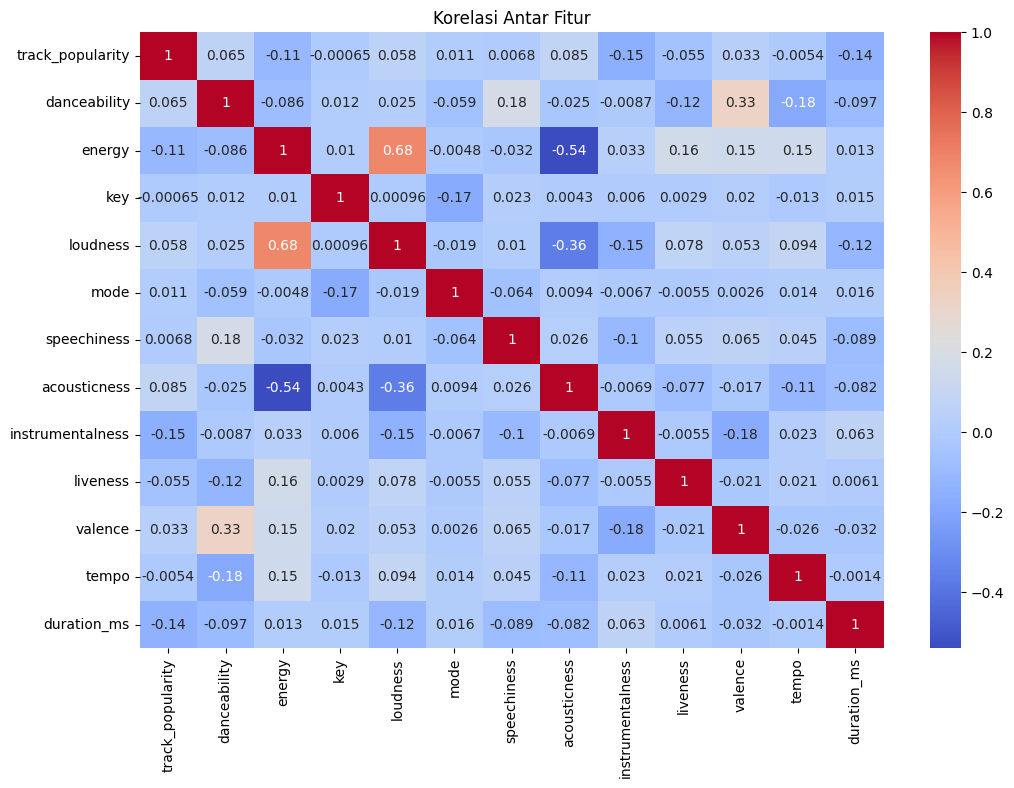

In [10]:
# Korelasi antar fitur numerik
plt.figure(figsize=(12, 8))
sns.heatmap(df_music.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Korelasi Antar Fitur')
plt.show()

#### Penjelasan:
1. df_music.corr(numeric_only=True): Menghitung matriks korelasi hanya pada kolom numerik.
2. sns.heatmap(...): Membuat visualisasi korelasi antar fitur numerik.
  - annot=True: Menampilkan nilai korelasi pada setiap sel.
  - cmap='coolwarm': Skema warna dari biru ke merah untuk memudahkan interpretasi korelasi negatif dan positif.
3. plt.title: Menambahkan judul grafik.

#### Hasil
1. Heatmap ini membantu memahami hubungan antar fitur seperti energy, tempo, danceability, dsb.
2. Jika ada fitur yang sangat berkorelasi, mungkin bisa di-drop salah satunya untuk mengurangi redundansi dalam model.



### 3. Data Preparation

In [12]:
# Pilih fitur numerik untuk rekomendasi
features = ['danceability', 'energy', 'valence', 'tempo', 'loudness', 'speechiness', 'acousticness']

# Drop missing values
df_selected = df_music.dropna(subset=features + ['track_name', 'track_artist'])

# Sampling untuk efisiensi memori jika perlu
df_selected = df_selected.sample(n=5000, random_state=42).reset_index(drop=True)

# Standardisasi fitur
scaler = StandardScaler()
df_selected_scaled = scaler.fit_transform(df_selected[features]).astype('float32')

# Simpan info penting
df_selected = df_selected.reset_index(drop=True)

#### Penjelasan dan Langkah-langkah:
1. Pilih fitur numerik: Danceability, energy, valence, tempo, dll.
2. Bersihkan data: Hapus baris dengan nilai kosong.
3. Sampling: Ambil 5000 lagu acak agar proses cepat.
4. Standardisasi: Gunakan StandardScaler agar skala fitur seragam.
5. Reset index: Supaya baris data tetap sinkron dengan hasil scaling.

### 4. Modeling

#### Content Based Filtering

In [13]:
def recommend_content(track_name, top_n=5):
    match = df_selected[df_selected['track_name'] == track_name]
    if match.empty:
        return "Lagu tidak ditemukan."
    idx = match.index[0]
    cosine_sim = cosine_similarity([df_selected_scaled[idx]], df_selected_scaled)[0]
    sim_scores = list(enumerate(cosine_sim))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]  # Exclude input lagu
    recommendations = df_selected.iloc[[i[0] for i in sim_scores]][['track_name', 'track_artist']]
    return recommendations.reset_index(drop=True)

#### Penjelasan:
- Fungsi rekomendasi berdasarkan fitur audio, Fungsi ini menggunakan cosine similarity untuk mencari lagu yang paling mirip secara fitur dengan lagu input. Outputnya adalah daftar lagu rekomendasi.

#### Item-Based Filtering (berbasis fitur lagu)

In [14]:
# Menghitung similarity antar item (lagu) berdasarkan fitur numerik yang sama
item_sim = cosine_similarity(df_selected_scaled)
item_sim_df = pd.DataFrame(item_sim, index=df_selected['track_id'], columns=df_selected['track_id'])

# Fungsi rekomendasi berbasis item

def recommend_item(track_id, top_n=5):
    if track_id not in item_sim_df.index:
        return "Lagu tidak ditemukan."
    similar_scores = item_sim_df[track_id].sort_values(ascending=False)
    similar_ids = similar_scores.index[1:top_n+1]
    recommendations = df_selected[df_selected['track_id'].isin(similar_ids)][['track_id', 'track_name', 'track_artist']]
    return recommendations.reset_index(drop=True)

#### Penjelasan:
-  Menghitung similarity antar item (lagu) berdasarkan fitur numerik yang sama, Pendekatan ini mencari lagu lain yang paling mirip secara keseluruhan fitur terhadap lagu yang diberikan, berdasarkan track ID-nya.
- Sama seperti content-based, tapi cara pencocokan menggunakan ID lagu sebagai basis.
- Biasanya digunakan dalam sistem backend atau untuk optimasi saat sudah menyimpan matriks similarity.

### 5. Evaluasi

- Cosine Similarity digunakan sebagai metrik evaluasi kedekatan lagu berdasarkan fitur audio.
- Evaluasi dilakukan secara subyektif dengan melihat relevansi hasil rekomendasi.
- Tanpa data eksplisit dari pengguna, metrik lain seperti precision/recall tidak dapat digunakan.

### 6. Contoh Penggunaan

In [28]:
print("\nRekomendasi Content-Based:")
print(recommend_content("Heaven"))

print("\nRekomendasi Item-Based:")
# Cek apakah lagu tersedia
matches = df_selected[df_selected['track_name'] == "Heaven"]
if not matches.empty:
    example_track_id = matches.iloc[0]['track_id']
    print(recommend_item(example_track_id))
else:
    print("Heaven' tidak ditemukan di dataset.")



Rekomendasi Content-Based:
                                  track_name  track_artist
0  Policy Of Truth - 2006 Remastered Version  Depeche Mode
1                                       2Shy         Shura
2                                     Sabdoy         Knust
3                              Simple Things       HarukiD
4                              American Teen        Khalid

Rekomendasi Item-Based:
                 track_id                                 track_name  \
0  0lHYQoSwhIKqUjUsbQygyl                              Simple Things   
1  5bRVVn6Q1SKqgV1EMkYC2p                                     Sabdoy   
2  23OvxppBAZq6xqLrQpyytj                                       2Shy   
3  312WNtMs3F28cUukaPY9bo                              American Teen   
4  0C6EIiQu8CS4eYtOCMEiAd  Policy Of Truth - 2006 Remastered Version   

   track_artist  
0       HarukiD  
1         Knust  
2         Shura  
3        Khalid  
4  Depeche Mode  


#### Penjelasan:
- Bagian ini menunjukkan bagaimana fungsi-fungsi rekomendasi digunakan secara nyata untuk menghasilkan output rekomendasi lagu.
